## **Milestone 2 Requirements and changes**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Ensure plt is imported here

## **Checking for Duplicates and removing the Duplicates**

In [2]:
df = pd.read_csv('crime_data_cleaned_final_2024.csv')

#check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


# Remove duplicates
df = df.drop_duplicates()


Number of duplicate rows: 766


## Using 'Unknown': Filling missing values with 'Unknown' can prevent missing data from disrupting the model and reduce the bias in the data.

## Handling the outliers.


In [3]:
if 'Weapon Used Cd' in df.columns:
   df['Weapon Used Cd'] = df['Weapon Used Cd'].fillna('Unknown')


if 'Weapon Desc' in df.columns:
   df['Weapon Desc'] = df['Weapon Desc'].fillna('Unknown')

# Convert Age to integer
if 'Age' in df.columns:
   # Fill missing age values with median age (you can adjust the strategy)
   df['Age'] = df['Age'].fillna(df['Age'].median()).astype(int)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


for col in numeric_columns:
   Q1 = df[col].quantile(0.25)
   Q3 = df[col].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   # Capping outliers
   df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

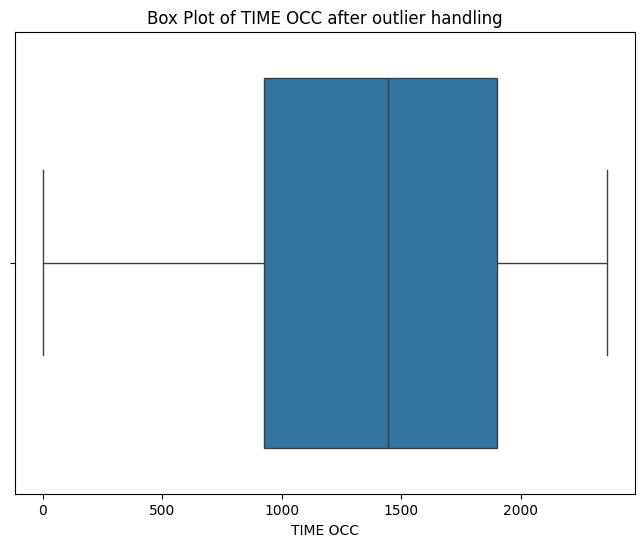

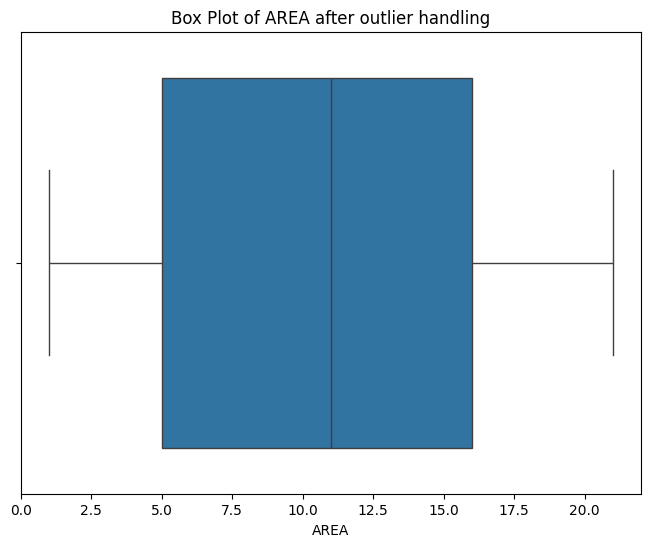

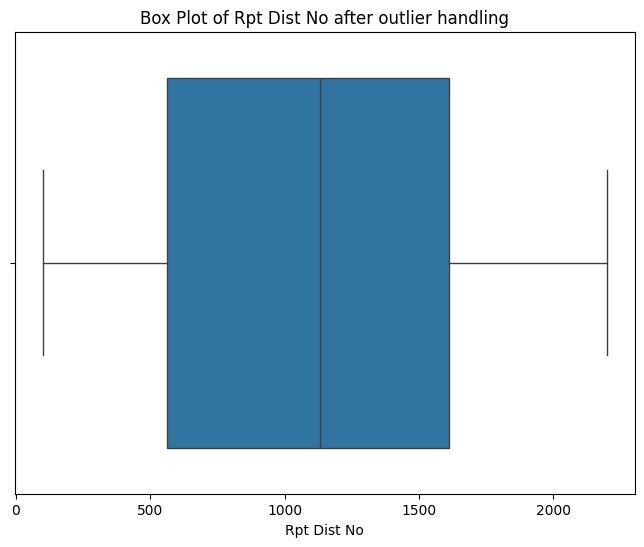

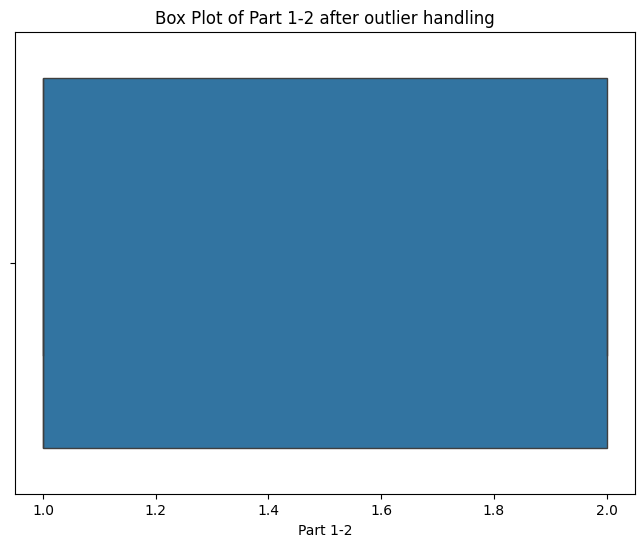

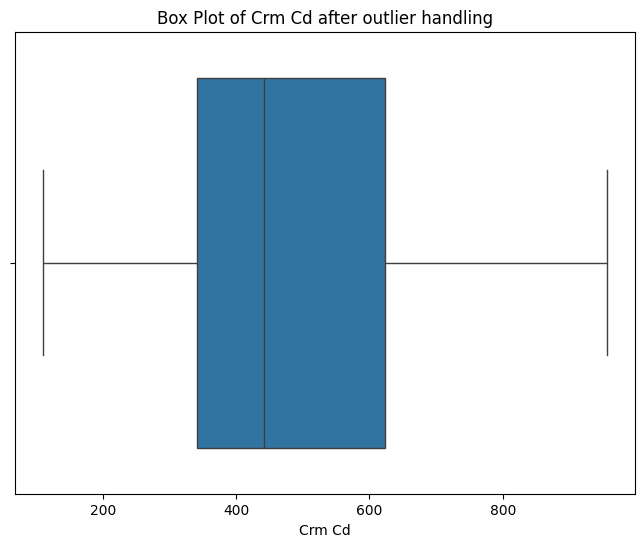

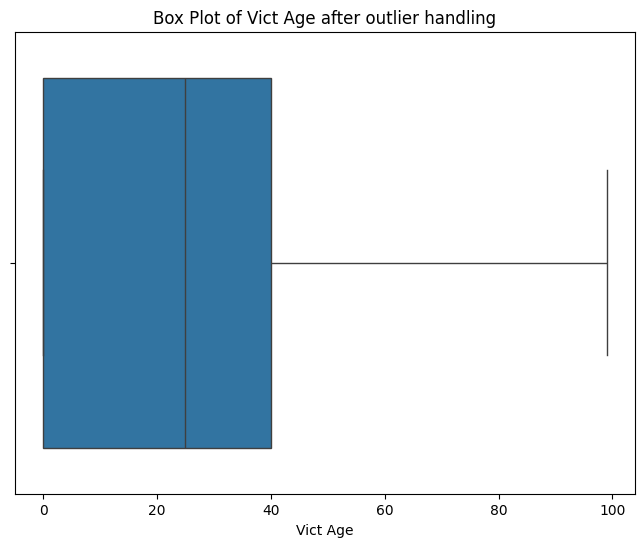

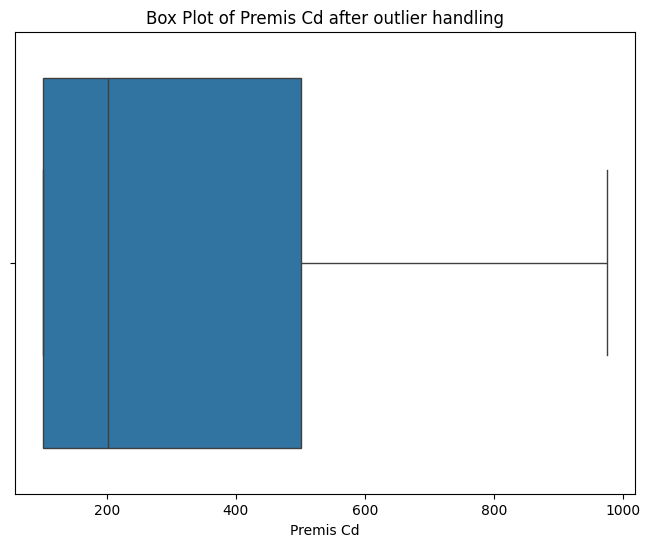

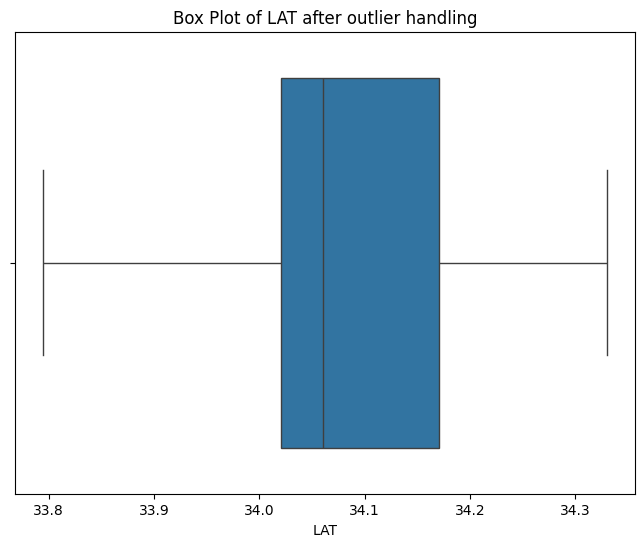

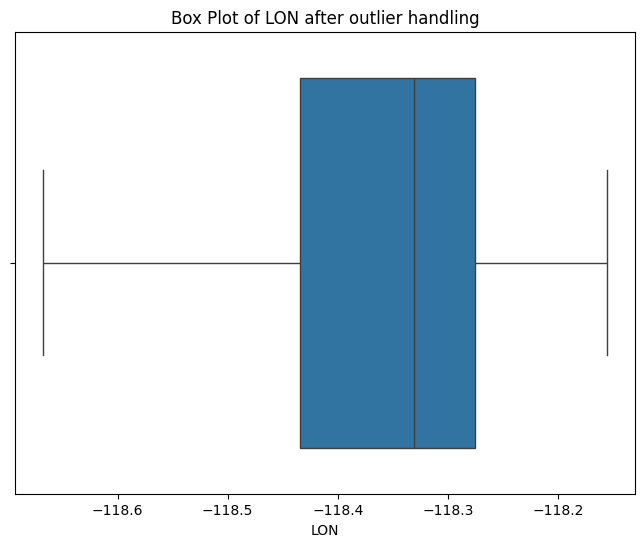

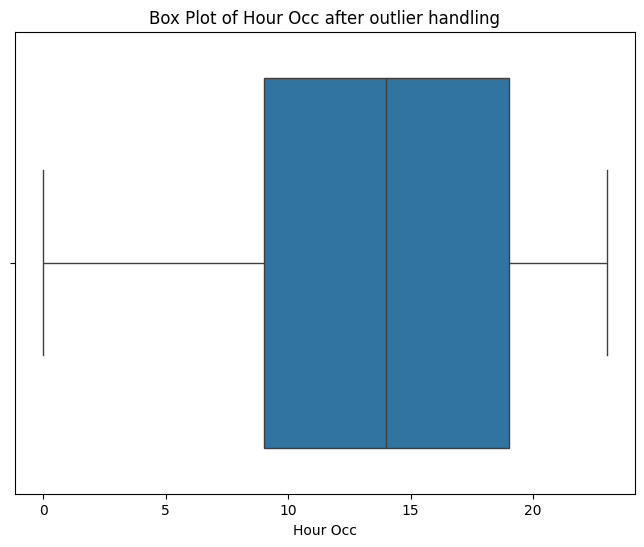

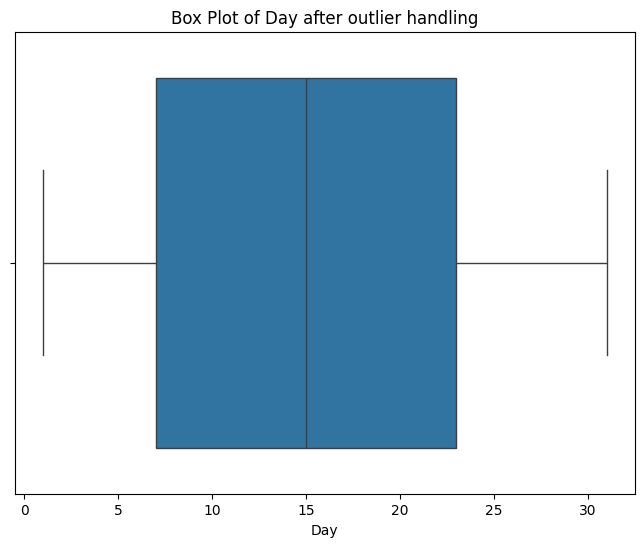

In [4]:
# prompt: display the graph for the outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with outliers handled

for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} after outlier handling')
    plt.show()

In [5]:
df.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,...,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON,Time of Day,Hour Occ,Day,Coordinates
0,01/22/2024 12:00:00 AM,2024-01-01,415,15,N Hollywood,1519,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,...,Unknown,IC,Invest Cont,6400 N CLYBOURN AV,34.1867,-118.3638,Night,4,1,POINT (-118.3638 34.1867)
1,01/02/2024 12:00:00 AM,2024-01-01,2000,12,77th Street,1269,1,330,BURGLARY FROM VEHICLE,49,...,Unknown,IC,Invest Cont,1000 E 84TH ST,33.9629,-118.2573,Evening,20,1,POINT (-118.2573 33.9629)
2,01/01/2024 12:00:00 AM,2024-01-01,1437,18,Southeast,1863,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0,...,Unknown,IC,Invest Cont,600 E IMPERIAL HY,33.9310,-118.2652,Afternoon,14,1,POINT (-118.2652 33.931)
3,01/02/2024 12:00:00 AM,2024-01-01,1645,13,Newton,1341,2,624,BATTERY - SIMPLE ASSAULT,43,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,3800 BROADWAY PL,34.0132,-118.2761,Afternoon,16,1,POINT (-118.2761 34.0132)
4,01/01/2024 12:00:00 AM,2024-01-01,200,21,Topanga,2107,2,624,BATTERY - SIMPLE ASSAULT,51,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,20900 ROSCOE BL,34.2234,-118.5932,Night,2,1,POINT (-118.5932 34.2234)


In [6]:
df.to_csv('crime_data_cleaned_final_2024.csv', index=False)

Training Logistic Regression...
Logistic Regression - Accuracy: 0.9162, Precision: 0.9092, Recall: 0.8280, F1 Score: 0.8667, ROC AUC: 0.9644562506417437


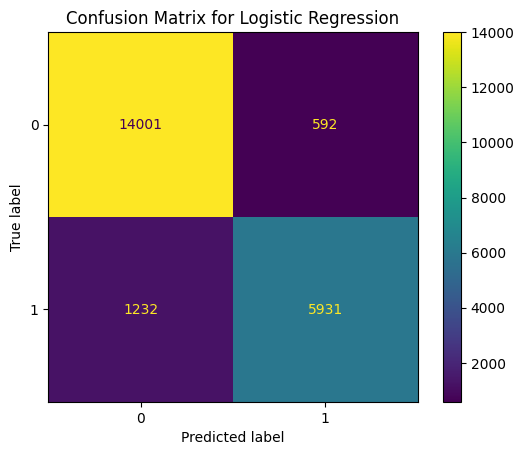

Training Random Forest...
Random Forest - Accuracy: 0.9600, Precision: 0.9591, Recall: 0.9176, F1 Score: 0.9379, ROC AUC: 0.9930679435202213


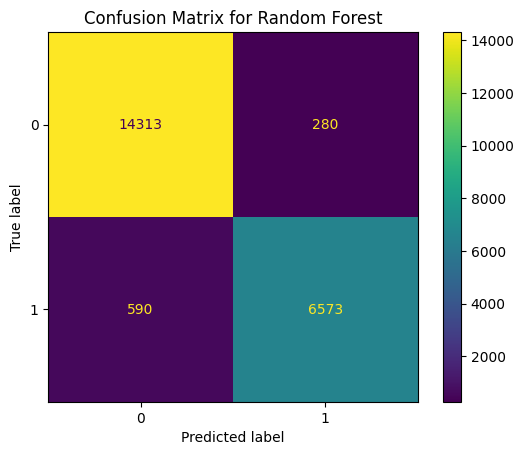

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.9365, Precision: 0.9456, Recall: 0.8563, F1 Score: 0.8988, ROC AUC: 0.9828469592539281


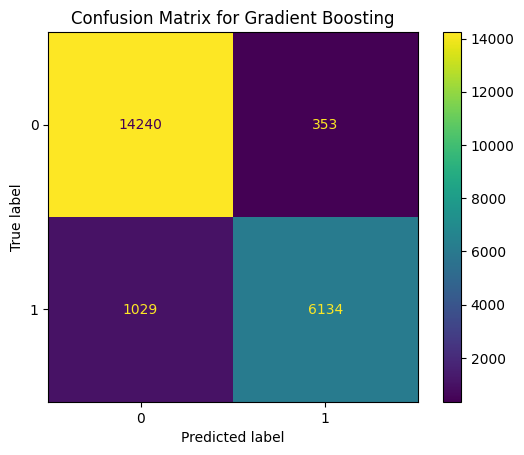

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:04:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.9604, Precision: 0.9462, Recall: 0.9328, F1 Score: 0.9395, ROC AUC: 0.9929606773136035


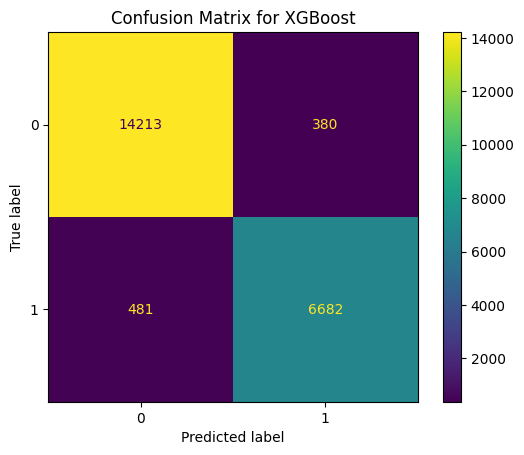

Training Support Vector Machine...
Support Vector Machine - Accuracy: 0.9626, Precision: 0.9546, Recall: 0.9306, F1 Score: 0.9425, ROC AUC: 0.9900692395829971


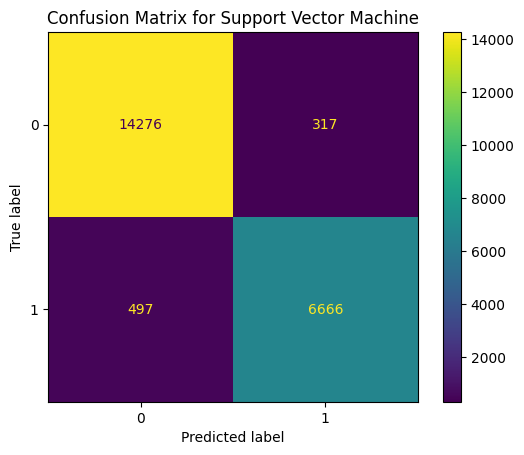

Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.9380, Precision: 0.9206, Recall: 0.8883, F1 Score: 0.9042, ROC AUC: 0.9762250826820358


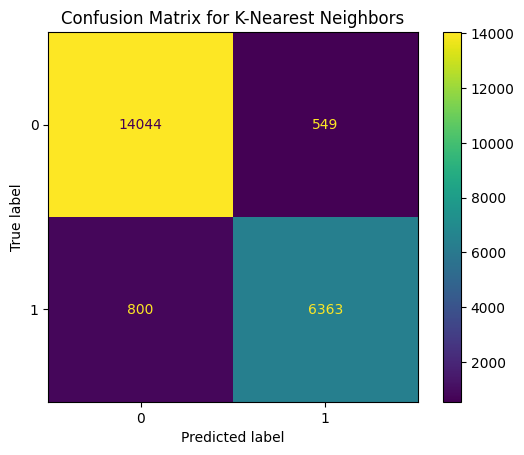

Training Naive Bayes...
Naive Bayes - Accuracy: 0.9048, Precision: 0.9112, Recall: 0.7877, F1 Score: 0.8449, ROC AUC: 0.9492038235770003


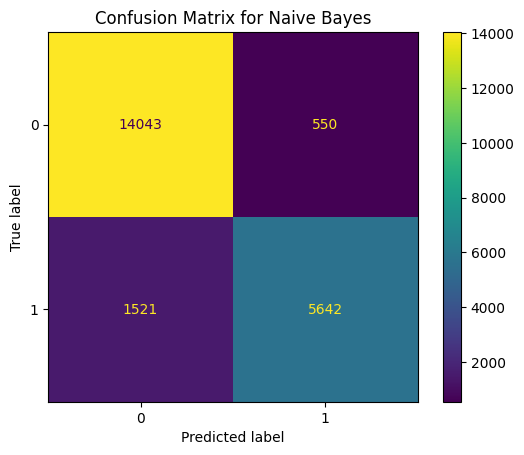

Training Linear Discriminant Analysis...
Linear Discriminant Analysis - Accuracy: 0.9305, Precision: 0.9496, Recall: 0.8333, F1 Score: 0.8876, ROC AUC: 0.9539561972549819


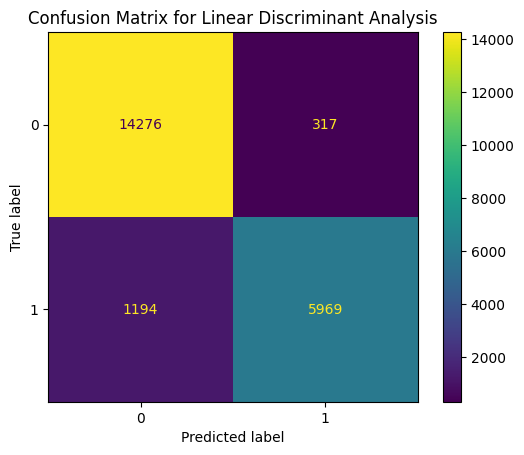

Training Decision Tree...
Decision Tree - Accuracy: 0.9343, Precision: 0.9040, Recall: 0.8956, F1 Score: 0.8998, ROC AUC: 0.9244541350699327


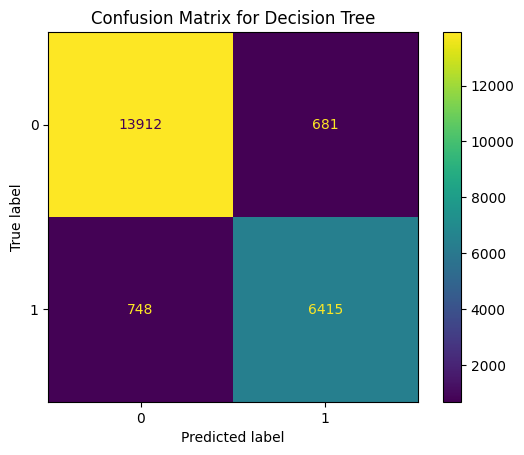

Training Multi-Layer Perceptron...
Multi-Layer Perceptron - Accuracy: 0.9966, Precision: 0.9968, Recall: 0.9929, F1 Score: 0.9948, ROC AUC: 0.9997464356025498


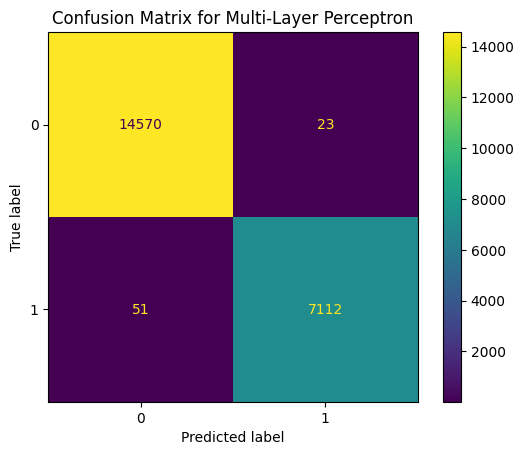

Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Accuracy: 0.9150, Precision: 0.8975, Recall: 0.8374, F1 Score: 0.8664, ROC AUC: 0.9698778219490795


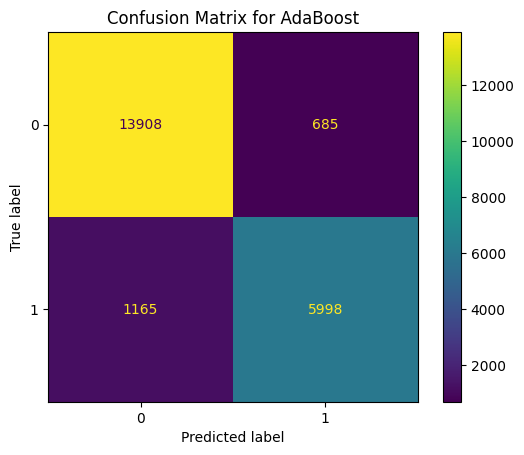


Model Performance Summary:
                           Model  Accuracy  Precision    Recall  F1 Score  \
0            Logistic Regression  0.916161   0.909244  0.828005  0.866725   
1                  Random Forest  0.960011   0.959142  0.917632  0.937928   
2              Gradient Boosting  0.936477   0.945583  0.856345  0.898755   
3                        XGBoost  0.960425   0.946191  0.932849  0.939473   
4         Support Vector Machine  0.962585   0.954604  0.930616  0.942457   
5            K-Nearest Neighbors  0.937994   0.920573  0.888315  0.904156   
6                    Naive Bayes  0.904808   0.911176  0.787659  0.844927   
7   Linear Discriminant Analysis  0.930548   0.949570  0.833310  0.887650   
8                  Decision Tree  0.934317   0.904030  0.895574  0.899783   
9         Multi-Layer Perceptron  0.996599   0.996776  0.992880  0.994824   
10                      AdaBoost  0.914966   0.897501  0.837359  0.866387   

     ROC AUC  
0   0.964456  
1   0.993068  
2 

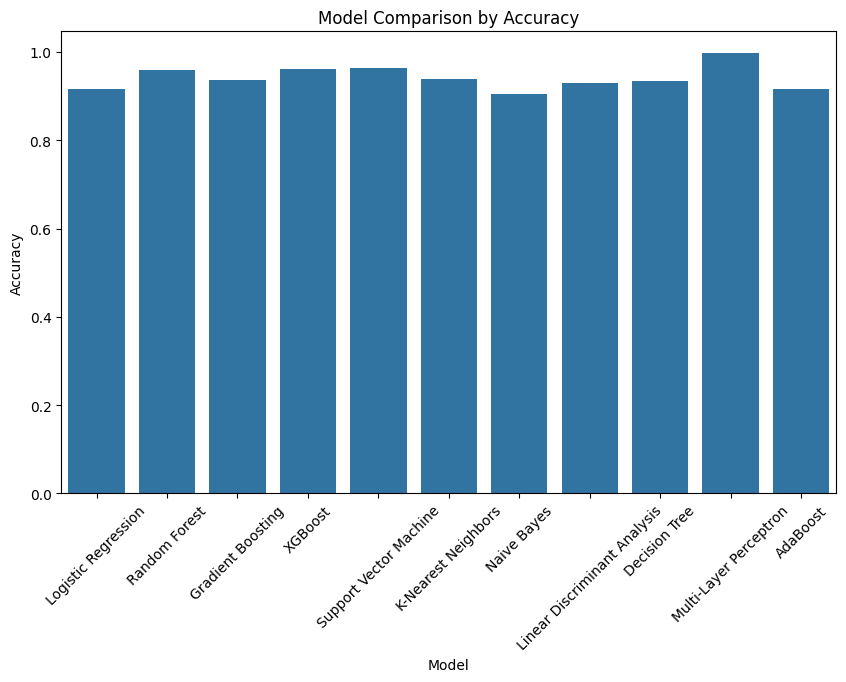

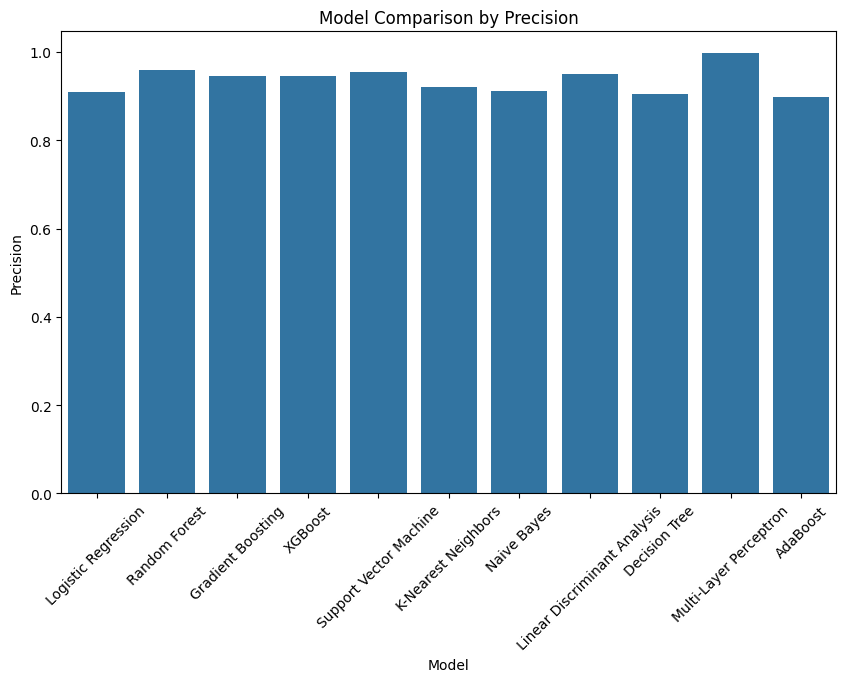

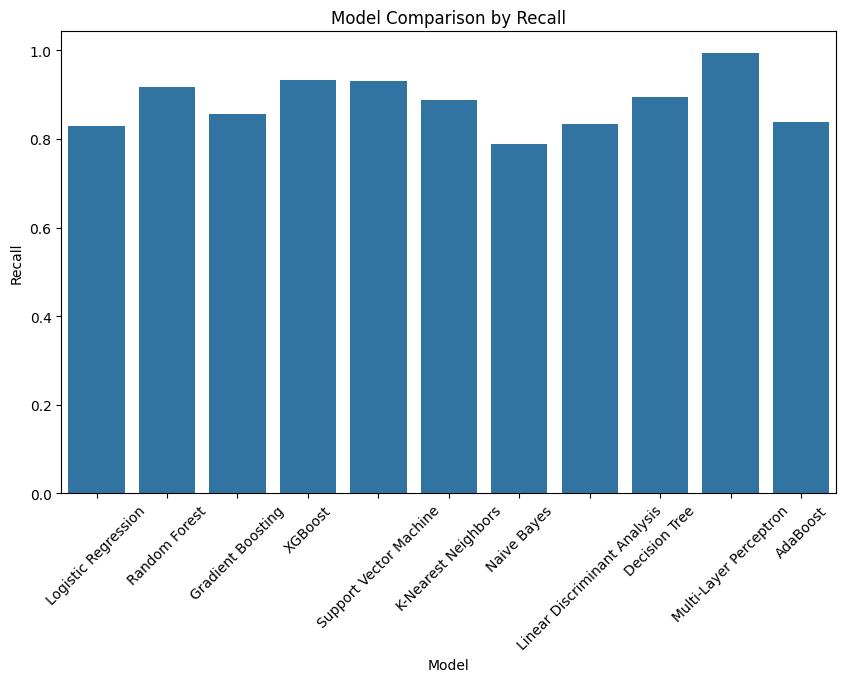

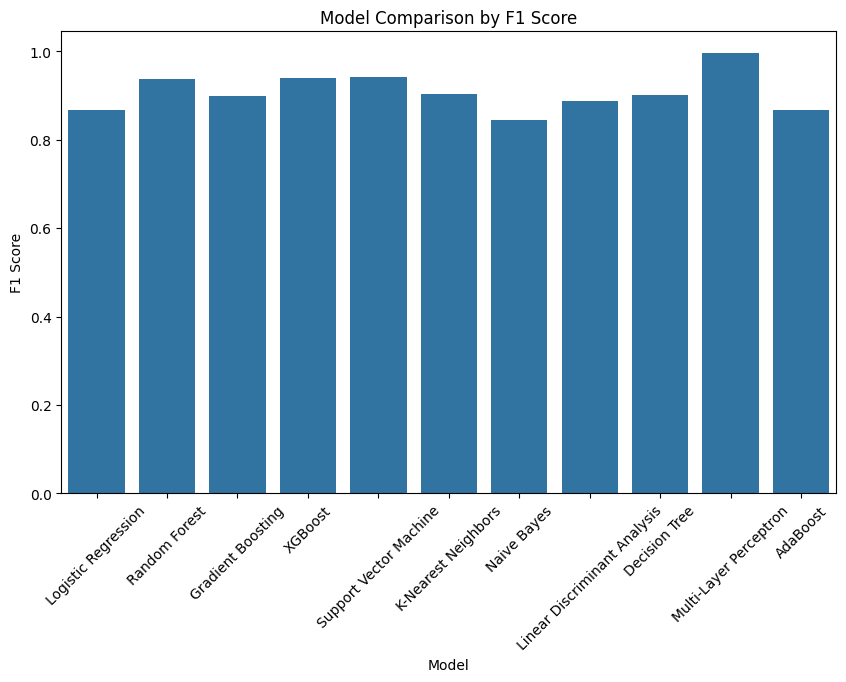

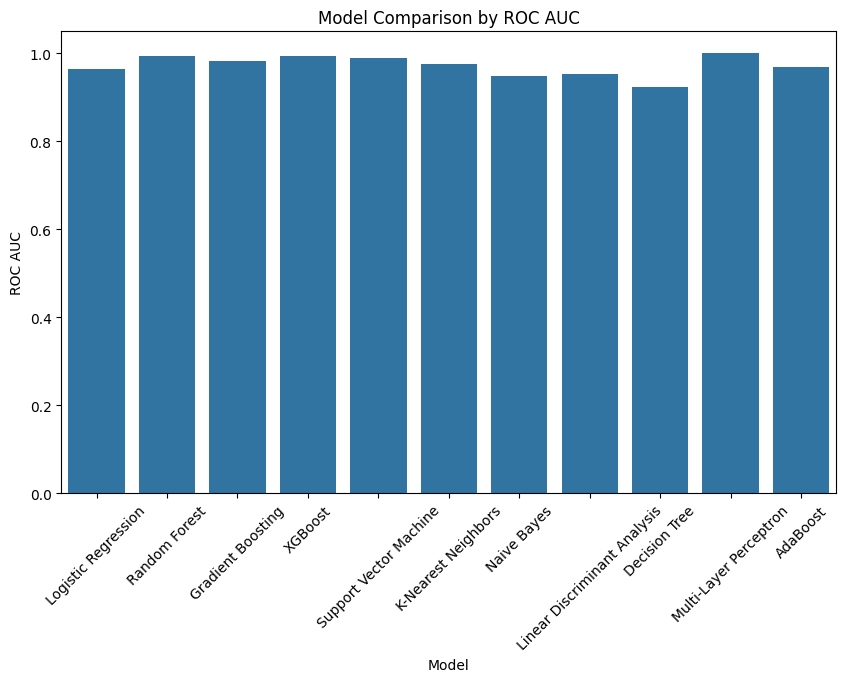

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Ensure plt is imported here
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold


# Load preprocessed data
df = pd.read_csv('crime_data_cleaned_final_2024.csv')

# Convert DATE OCC to numerical if present
if 'DATE OCC' in df.columns:
    df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
    df['Days_Since_Start'] = (df['DATE OCC'] - df['DATE OCC'].min()).dt.days
    df.drop(columns=['DATE OCC'], inplace=True)

# Convert high-cardinality categorical columns using Label Encoding to save memory
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['Part 1-2'])
y = df['Part 1-2'] - 1  # Ensure binary target classes [0, 1]

# Standardize features to improve model performance and convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce feature dimensionality using Variance Thresholding
var_thresh = VarianceThreshold(threshold=0.01)
X_reduced = var_thresh.fit_transform(X_scaled)

# Further reduce dimensions with PCA (adjust components based on dataset)
max_components = min(X_reduced.shape[1], X_reduced.shape[0])
pca = PCA(n_components=min(20, max_components))  # Adjust to <= remaining features
X_pca = pca.fit_transform(X_reduced)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize models with modified parameters if needed
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),  # Increased max_iter for convergence
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(),
    "Multi-Layer Perceptron": MLPClassifier(max_iter=1000),
    "AdaBoost": AdaBoostClassifier()
}

# Train, predict, and evaluate each model
results = []
for name, model in models.items():
    print(f"Training {name}...")
    try:
        # Train model
        model.fit(X_train, y_train)

        # Predictions and Probabilities
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Calculate Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"

        results.append([name, accuracy, precision, recall, f1, roc_auc])

        # Display metrics
        print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc if roc_auc != 'N/A' else 'N/A'}")

        # Plot Confusion Matrix
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
        plt.title(f'Confusion Matrix for {name}')
        plt.show()

    except Exception as e:
        print(f"Error training {name}: {e}")

# Summary Table of Model Performance
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

# Display the results
print("\nModel Performance Summary:")
print(results_df)

# Visual Comparison of Model Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]

# Separate plots for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Model", y=metric, data=results_df)
    plt.title(f'Model Comparison by {metric}')
    plt.xticks(rotation=45)
    plt.show()


=== Hyperparameter Tuning for Logistic Regression ===
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}

Logistic Regression - Test Metrics:
Accuracy: 0.9162, Precision: 0.9094, Recall: 0.8280, F1 Score: 0.8668, ROC AUC: 0.9644911785276177

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14593
           1       0.91      0.83      0.87      7163

    accuracy                           0.92     21756
   macro avg       0.91      0.89      0.90     21756
weighted avg       0.92      0.92      0.92     21756



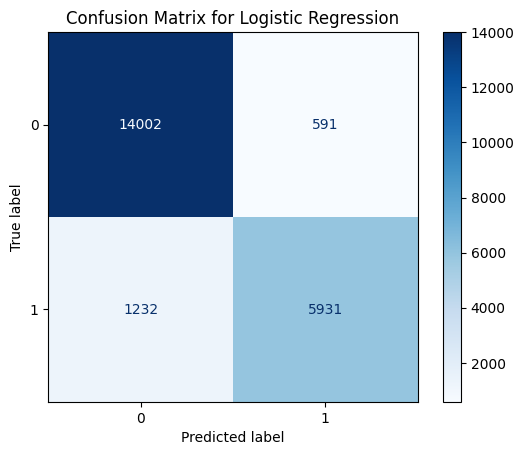


=== Hyperparameter Tuning for Random Forest ===
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

Random Forest - Test Metrics:
Accuracy: 0.9609, Precision: 0.9602, Recall: 0.9193, F1 Score: 0.9393, ROC AUC: 0.9931977870510417

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14593
           1       0.96      0.92      0.94      7163

    accuracy                           0.96     21756
   macro avg       0.96      0.95      0.96     21756
weighted avg       0.96      0.96      0.96     21756



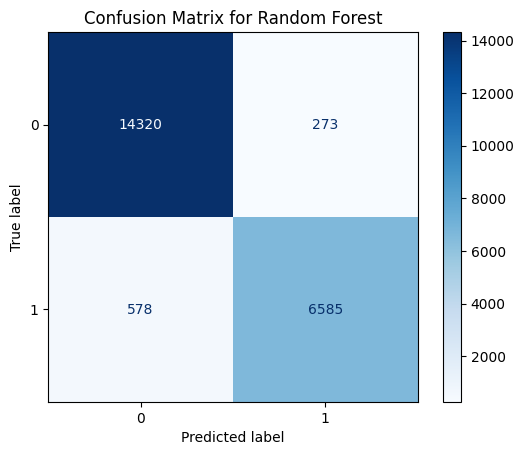


=== Hyperparameter Tuning for Gradient Boosting ===
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}

Gradient Boosting - Test Metrics:
Accuracy: 0.9577, Precision: 0.9447, Recall: 0.9257, F1 Score: 0.9351, ROC AUC: 0.9897678610048848

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     14593
           1       0.94      0.93      0.94      7163

    accuracy                           0.96     21756
   macro avg       0.95      0.95      0.95     21756
weighted avg       0.96      0.96      0.96     21756



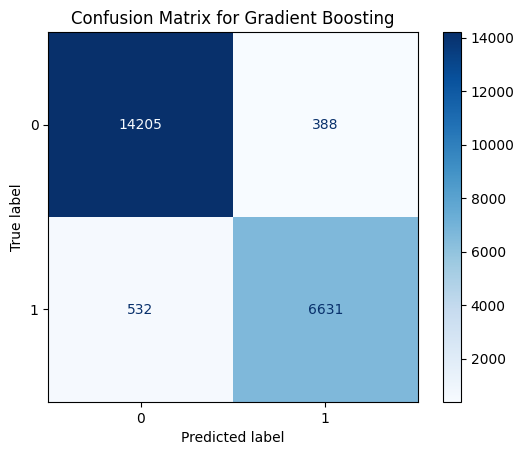


=== Hyperparameter Tuning for XGBoost ===


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:13:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

XGBoost - Test Metrics:
Accuracy: 0.9562, Precision: 0.9482, Recall: 0.9169, F1 Score: 0.9323, ROC AUC: 0.9914586251544167

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14593
           1       0.95      0.92      0.93      7163

    accuracy                           0.96     21756
   macro avg       0.95      0.95      0.95     21756
weighted avg       0.96      0.96      0.96     21756



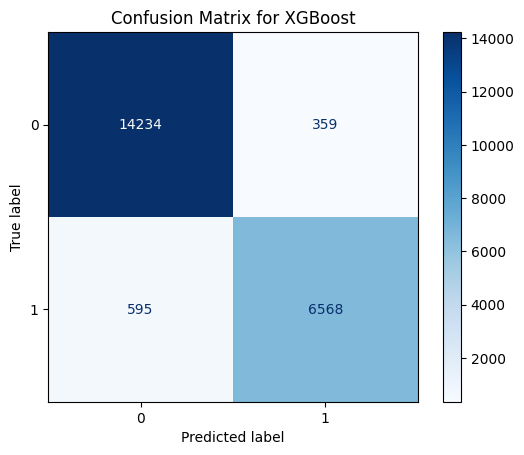


=== Hyperparameter Tuning for Support Vector Machine ===
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Support Vector Machine - Test Metrics:
Accuracy: 0.9626, Precision: 0.9546, Recall: 0.9306, F1 Score: 0.9425, ROC AUC: 0.9900694978828928

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     14593
           1       0.95      0.93      0.94      7163

    accuracy                           0.96     21756
   macro avg       0.96      0.95      0.96     21756
weighted avg       0.96      0.96      0.96     21756



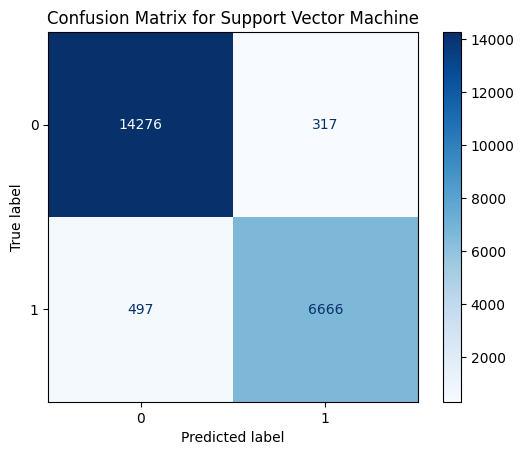


=== Hyperparameter Tuning for K-Nearest Neighbors ===
Best Parameters: {'n_neighbors': 5, 'weights': 'uniform'}

K-Nearest Neighbors - Test Metrics:
Accuracy: 0.9380, Precision: 0.9206, Recall: 0.8883, F1 Score: 0.9042, ROC AUC: 0.9762250826820358

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14593
           1       0.92      0.89      0.90      7163

    accuracy                           0.94     21756
   macro avg       0.93      0.93      0.93     21756
weighted avg       0.94      0.94      0.94     21756



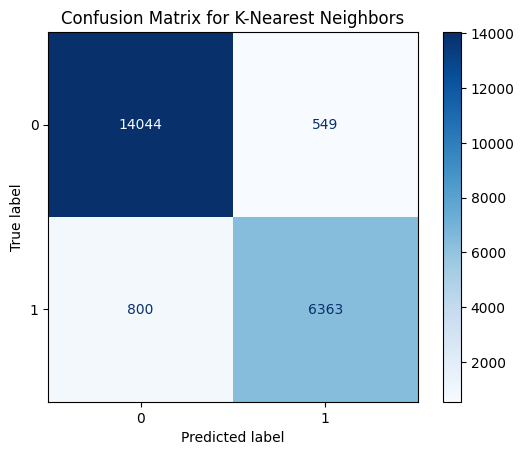


=== Hyperparameter Tuning for Naive Bayes ===

Naive Bayes - Test Metrics:
Accuracy: 0.9048, Precision: 0.9112, Recall: 0.7877, F1 Score: 0.8449, ROC AUC: 0.9492038235770003

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     14593
           1       0.91      0.79      0.84      7163

    accuracy                           0.90     21756
   macro avg       0.91      0.87      0.89     21756
weighted avg       0.91      0.90      0.90     21756



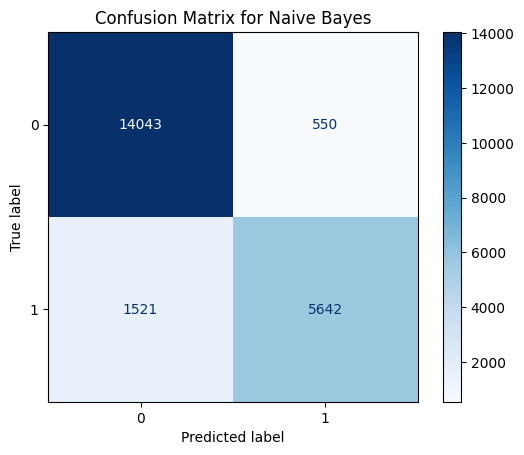


=== Hyperparameter Tuning for Linear Discriminant Analysis ===

Linear Discriminant Analysis - Test Metrics:
Accuracy: 0.9305, Precision: 0.9496, Recall: 0.8333, F1 Score: 0.8876, ROC AUC: 0.9539561972549819

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14593
           1       0.95      0.83      0.89      7163

    accuracy                           0.93     21756
   macro avg       0.94      0.91      0.92     21756
weighted avg       0.93      0.93      0.93     21756



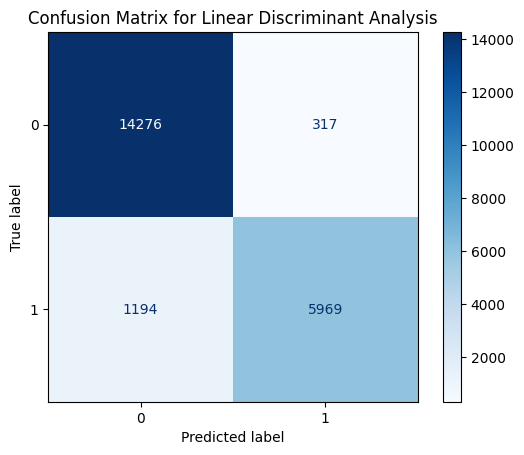


=== Hyperparameter Tuning for Decision Tree ===
Best Parameters: {'max_depth': 10, 'min_samples_split': 5}

Decision Tree - Test Metrics:
Accuracy: 0.9311, Precision: 0.8983, Recall: 0.8918, F1 Score: 0.8951, ROC AUC: 0.9647790681111855

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14593
           1       0.90      0.89      0.90      7163

    accuracy                           0.93     21756
   macro avg       0.92      0.92      0.92     21756
weighted avg       0.93      0.93      0.93     21756



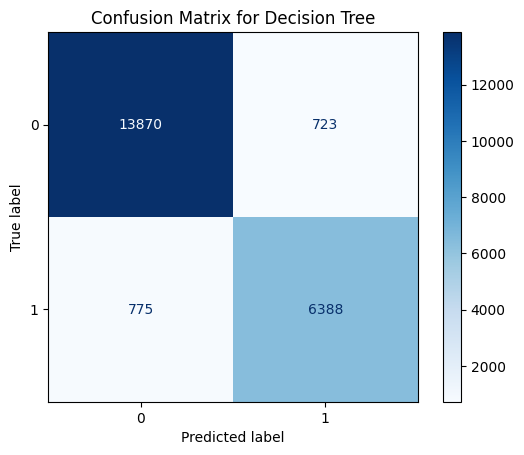


=== Hyperparameter Tuning for Multi-Layer Perceptron ===
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}

Multi-Layer Perceptron - Test Metrics:
Accuracy: 0.9986, Precision: 0.9982, Recall: 0.9976, F1 Score: 0.9979, ROC AUC: 0.9999357407259886

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14593
           1       1.00      1.00      1.00      7163

    accuracy                           1.00     21756
   macro avg       1.00      1.00      1.00     21756
weighted avg       1.00      1.00      1.00     21756



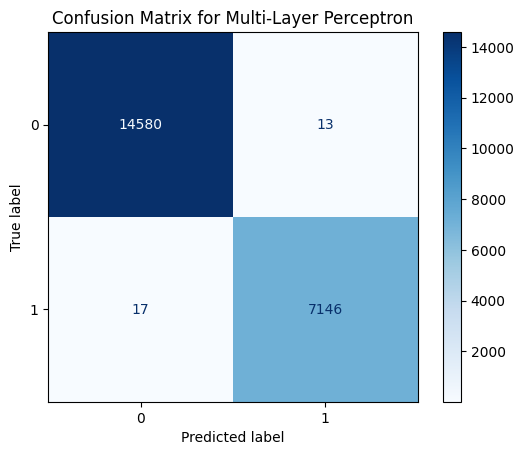


=== Hyperparameter Tuning for AdaBoost ===


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}

AdaBoost - Test Metrics:
Accuracy: 0.9208, Precision: 0.9025, Recall: 0.8515, F1 Score: 0.8762, ROC AUC: 0.9742840546337188

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14593
           1       0.90      0.85      0.88      7163

    accuracy                           0.92     21756
   macro avg       0.92      0.90      0.91     21756
weighted avg       0.92      0.92      0.92     21756



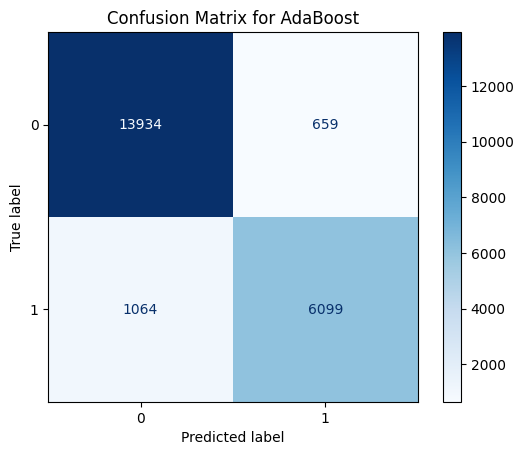


=== Tuned Model Performance Summary ===
                           Model  Train Accuracy  Test Accuracy  Precision  \
0            Logistic Regression        0.915989       0.916207   0.909384   
1                  Random Forest        0.999379       0.960884   0.960192   
2              Gradient Boosting        0.977684       0.957713   0.944721   
3                        XGBoost        0.964745       0.956150   0.948174   
4         Support Vector Machine        0.964676       0.962585   0.954604   
5            K-Nearest Neighbors        0.959482       0.937994   0.920573   
6                    Naive Bayes        0.907405       0.904808   0.911176   
7   Linear Discriminant Analysis        0.930410       0.930548   0.949570   
8                  Decision Tree        0.945693       0.931145   0.898327   
9         Multi-Layer Perceptron        0.999885       0.998621   0.998184   
10                      AdaBoost        0.922780       0.920803   0.902486   

      Recall  F1 Score

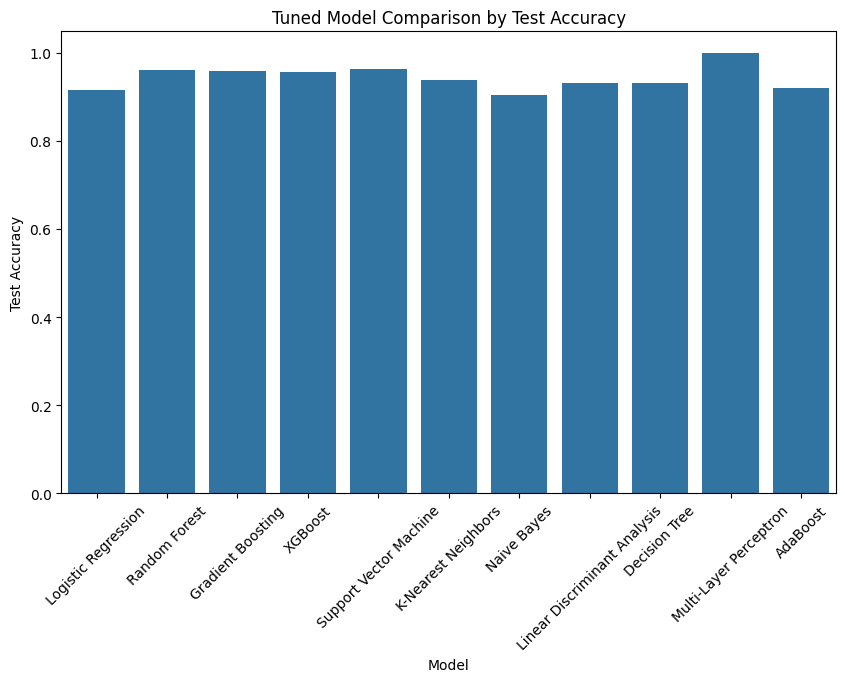

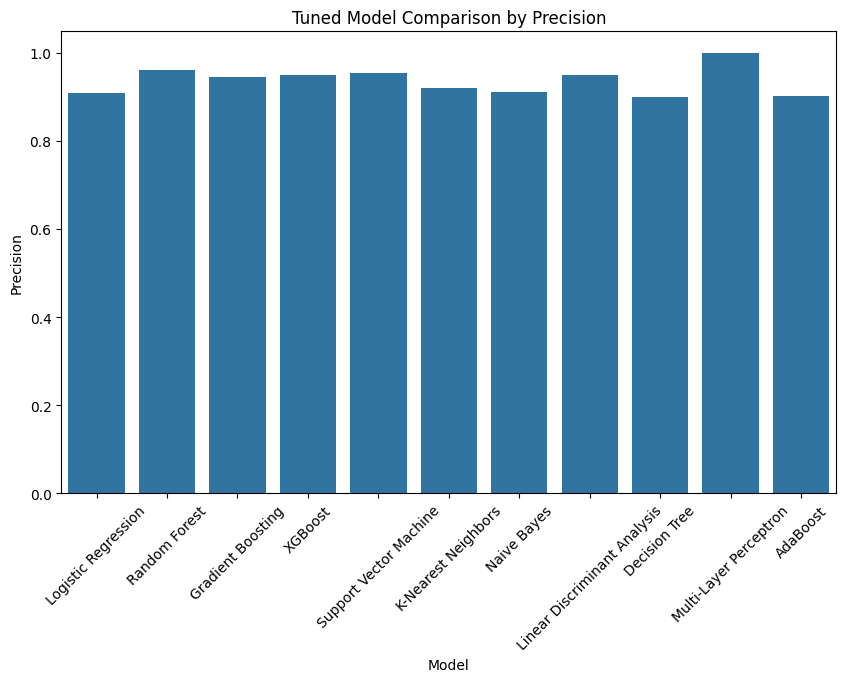

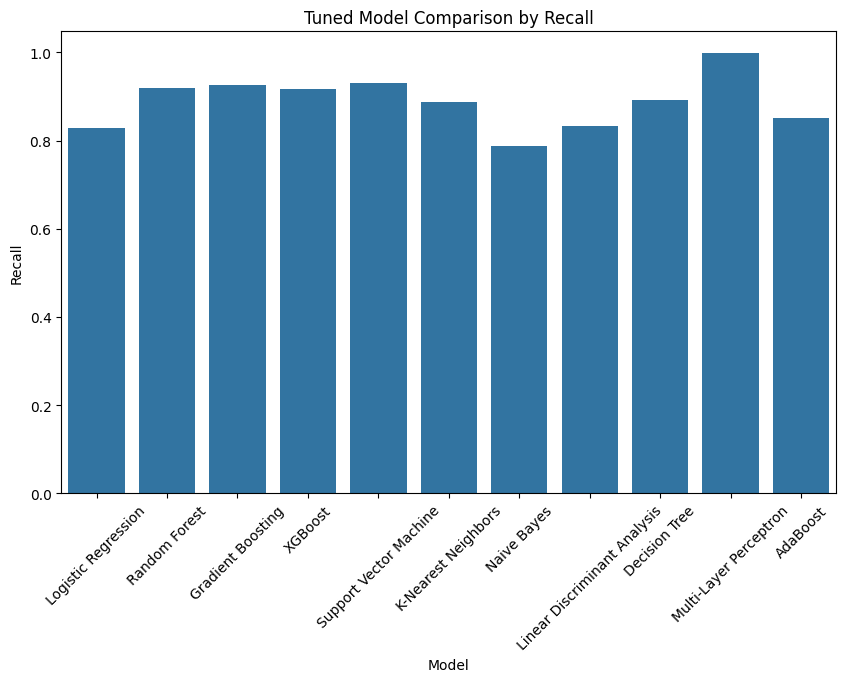

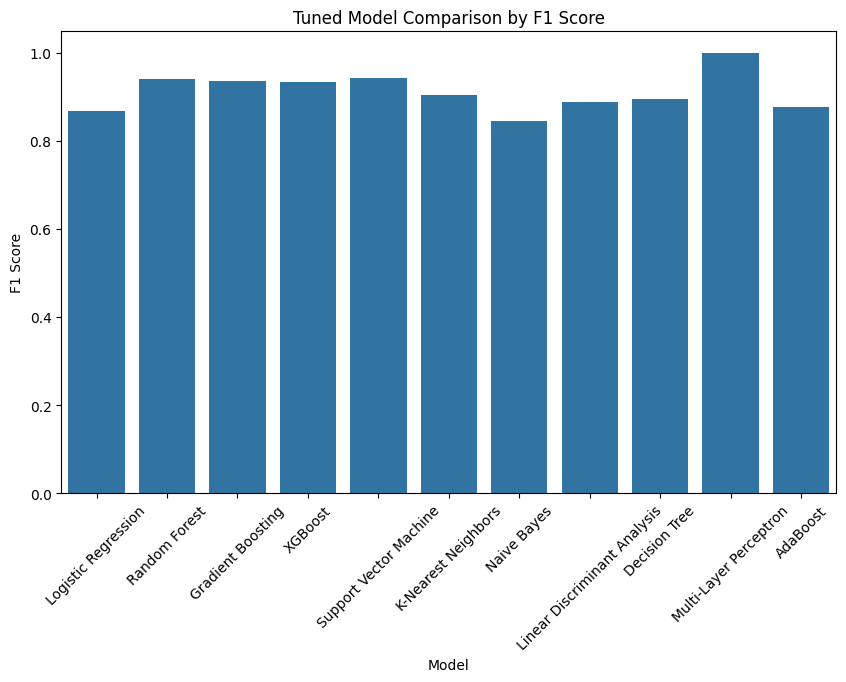

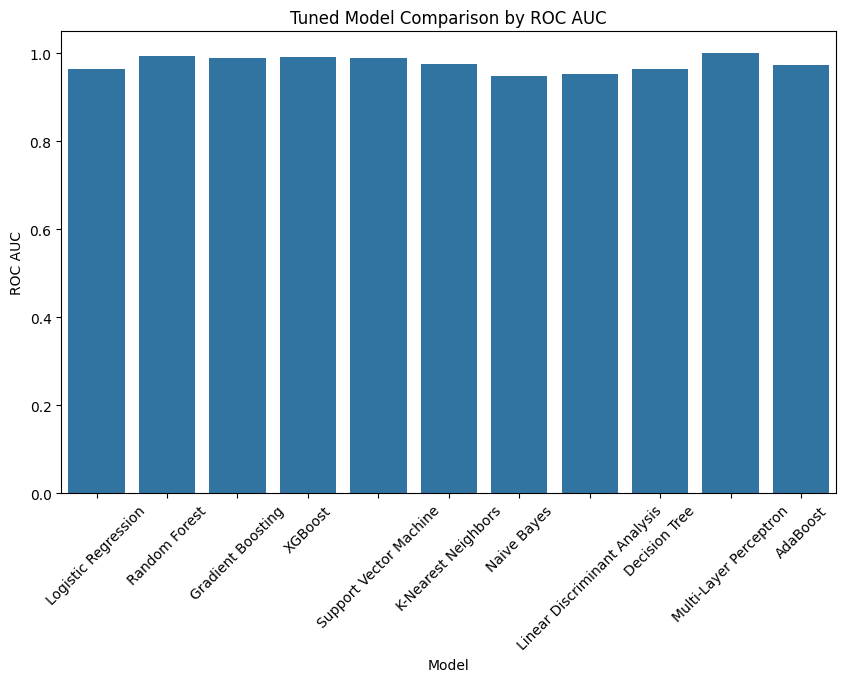

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Hyperparameter grids for tuning
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [10, None],
        'min_samples_split': [2, 5]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 5]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.1],
        'max_depth': [3, 5]
    },
    "Support Vector Machine": {
        'C': [1],
        'kernel': ['rbf'],
        'gamma': ['scale']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5],
        'weights': ['uniform']
    },
    "Naive Bayes": {},  # No hyperparameters to tune
    "Linear Discriminant Analysis": {},  # No hyperparameters to tune
    "Decision Tree": {
        'max_depth': [10, None],
        'min_samples_split': [2, 5]
    },
    "Multi-Layer Perceptron": {
        'hidden_layer_sizes': [(100,), (50, 50)],
        'activation': ['relu'],
        'solver': ['adam']
    },
    "AdaBoost": {
        'n_estimators': [50, 100],
        'learning_rate': [1.0]
    }
}

# Perform hyperparameter tuning and evaluate models
tuned_results = []
for name, model in models.items():
    print(f"\n=== Hyperparameter Tuning for {name} ===")
    try:
        # Apply GridSearchCV only if there are parameters to tune
        if param_grids[name]:
            grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            print(f"Best Parameters: {grid_search.best_params_}")
        else:
            best_model = model
            best_model.fit(X_train, y_train)

        # Predictions and metrics
        y_pred_test = best_model.predict(X_test)
        y_pred_train = best_model.predict(X_train)
        y_prob_test = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

        # Metrics
        accuracy_test = accuracy_score(y_test, y_pred_test)
        precision_test = precision_score(y_test, y_pred_test)
        recall_test = recall_score(y_test, y_pred_test)
        f1_test = f1_score(y_test, y_pred_test)
        roc_auc_test = roc_auc_score(y_test, y_prob_test) if y_prob_test is not None else "N/A"

        # Evaluate training performance to check for overfitting
        accuracy_train = accuracy_score(y_train, y_pred_train)

        print(f"\n{name} - Test Metrics:")
        print(f"Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1 Score: {f1_test:.4f}, ROC AUC: {roc_auc_test}")
        print("\nClassification Report (Test):")
        print(classification_report(y_test, y_pred_test))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred_test)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues")
        plt.title(f'Confusion Matrix for {name}')
        plt.show()

        tuned_results.append([name, accuracy_train, accuracy_test, precision_test, recall_test, f1_test, roc_auc_test])

    except Exception as e:
        print(f"Error in tuning or evaluation for {name}: {e}")

# Convert results to DataFrame
tuned_results_df = pd.DataFrame(tuned_results, columns=["Model", "Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

# Display tuned results
print("\n=== Tuned Model Performance Summary ===")
print(tuned_results_df)

# Visual Comparison of Metrics
metrics = ["Test Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Model", y=metric, data=tuned_results_df)
    plt.title(f'Tuned Model Comparison by {metric}')
    plt.xticks(rotation=45)
    plt.show()
